# Data manipulation

## Learning objectives

- Discover what tensors are and how to manipulate them with [NumPy](https://numpy.org/) and [PyTorch](https://pytorch.org/).
- Be able to load and prepare datasets of different types (tabular data, images or videos) for training a Machine Learning model.
- Learn how the [pandas](https://pandas.pydata.org/) and [scikit-learn](https://scikit-learn.org) libraries can help achieve the previous task.

## Environment setup

In [89]:
import platform

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
from sklearn.datasets import load_sample_images
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

import torch

In [90]:
# Setup plots

# Include matplotlib graphs into the notebook, next to the code
# https://stackoverflow.com/a/43028034/2380880
%matplotlib inline

# Improve plot quality
%config InlineBackend.figure_format = "retina"

In [91]:
# Print environment info
print(f"Python version: {platform.python_version()}")
print(f"NumPy version: {np.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")
print(f"PyTorch version: {torch.__version__}")


# PyTorch device configuration
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"CUDA GPU {torch.cuda.get_device_name(0)} found :)")
# Performance issues exist with MPS backend
# elif torch.backends.mps.is_available():
#     device = torch.device("mps")
#     print("MPS GPU found :)")
else:
    device = torch.device("cpu")
    print("No GPU found, using CPU instead")

Python version: 3.11.1
NumPy version: 1.26.3
scikit-learn version: 1.3.2
PyTorch version: 2.0.1
No GPU found, using CPU instead


## Working with tensors

### Definition

In the context of AI, a **tensor** is a set of primitive values sharing the same type (most often numerical), shaped into an array of any number of dimensions. It is a fancy name for a multidimensional array.

Tensors are heavily used by AI algorithms to represent and manipulate information. They are, in particular, the core data structures of Machine Learning.

### Tensor properties

- A tensor's dimension is also called an **axis**.
- A tensor's **rank** is its number of axes.
- The tensor's **shape** describes the number of values along each axis.

In mathematical terms, a rank 0 tensor is a **scalar**, a rank 1 tensor is a **vector** and a rank 2 tensor is a **matrix**.

> Warning: *rank* and *dimension* are polysemic terms, which can be confusing.

### Tensors in Python

Python offers limited native support for manipulating tensors. Lists can be used to store information, but their mathematical capacities are insufficient for any serious work.

In [92]:
# A vector (rank 1 tensor)
a = [1, 2, 3]
print(a)

# A matrix (rank 2 tensor)
b = [a, [4, 5, 6]]
print(b)

[1, 2, 3]
[[1, 2, 3], [4, 5, 6]]


### Dedicated libraries

Over the years, several tools have been developed to overcome Python's native limitations.

The most widely used is [NumPy](https://numpy.org/), which supports tensors in the form of `ndarray` objects. It offers a comprehensive set of operations on them, including creating, sorting, selecting, linear algebra and statistical operations.

### Tensor management with NumPy

#### Creating tensors

The [np.array](https://numpy.org/doc/stable/reference/generated/numpy.array.html) function creates and returns a new tensor.

[![NumPy array creation](_images/numpy_array.png)](https://numpy.org/doc/stable/user/absolute_beginners.html#how-to-create-a-basic-array)

The [NumPy API](https://numpy.org/doc/stable/reference/routines.array-creation.html) contains many functions for creating tensors using predefined values.

In [93]:
def print_tensor_info(t):
    """Print values, number of dimensions and shape of a tensor"""

    print(t)
    print(f"Dimensions: {t.ndim}")
    print(f"Shape: {t.shape}")

In [94]:
# Create a scalar
x = np.array(12)

print_tensor_info(x)

12
Dimensions: 0
Shape: ()


In [95]:
# Create a vector (1D tensor)
x = np.array([1, 2, 3])

print_tensor_info(x)

[1 2 3]
Dimensions: 1
Shape: (3,)


#### Generating random tensors

The [NumPy API](https://numpy.org/doc/stable/reference/random/index.html) also permits the creation of (pseudo-)randomly valued tensors, using various statistical laws and data types.

In [96]:
# Init a NumPy random number generator
rng = np.random.default_rng()

# Create a 3x4 random matrix (2D tensor) with real values sampled from a uniform distribution
x = rng.uniform(size=(3, 4))

print_tensor_info(x)

[[0.1875555  0.62188322 0.37111724 0.27371191]
 [0.69765446 0.1594089  0.59248199 0.46596804]
 [0.7432791  0.0282667  0.13099192 0.2987171 ]]
Dimensions: 2
Shape: (3, 4)


In [97]:
# Create a 3x2x5 3D tensor with integer values sampled from a uniform distribution
x = rng.integers(low=0, high=100, size=(3, 2, 5))

print_tensor_info(x)

[[[65 19 45 38 68]
  [ 4 46 99 57 89]]

 [[55 43 63 17 86]
  [92 44 35 76 11]]

 [[35 53 23 70 74]
  [77 59 75 26 70]]]
Dimensions: 3
Shape: (3, 2, 5)


#### Shape management

A common operation on tensors is **reshaping**: giving it a new shape without changing its data.

The new shape must be compatible with the current one: the new tensor needs to have the same number of elements as the original one.

[![NumPy reshaping](_images/numpy_reshaping.png)](https://numpy.org/doc/stable/user/absolute_beginners.html#transposing-and-reshaping-a-matrix)

In [98]:
# Reshape a 3x2 matrix into a 2x3 matrix
x = np.array([[1, 2], [3, 4], [5, 6]])
x_reshaped = x.reshape(2, 3)

print_tensor_info(x_reshaped)

[[1 2 3]
 [4 5 6]]
Dimensions: 2
Shape: (2, 3)


In [99]:
# Reshape the previous matrix into a vector
x_reshaped = x.reshape(
    6,
)

print_tensor_info(x_reshaped)

[1 2 3 4 5 6]
Dimensions: 1
Shape: (6,)


In [100]:
# Error: incompatible shapes!
# x.reshape(5, )

#### Indexing and slicing

Tensors can be indexed and sliced just like regular Python lists.

[![NumPy indexing](_images/numpy_indexing.png)](https://numpy.org/doc/stable/user/absolute_beginners.html#indexing-and-slicing)

In [101]:
x = np.array([1, 2, 3])

# Select element at index 1
assert x[1] == 2

# Select elements between indexes 0 (included) and 2 (excluded)
assert np.array_equal(x[0:2], [1, 2])

# Select elements starting at index 1 (included)
assert np.array_equal(x[1:], [2, 3])

# Select last element
assert np.array_equal(x[-1], 3)

# Select all elements but last one
assert np.array_equal(x[:-1], [1, 2])

# Select last 2 elements
assert np.array_equal(x[-2:], [2, 3])

# Select second-to-last element
assert np.array_equal(x[-2:-1], [2])

#### Tensor axes

Many tensor operations can be applied along one or several **axes**. They are indexed starting at 0.

[![NumPy axes](_images/numpy_axes.png)](https://www.sharpsightlabs.com/blog/numpy-axes-explained/)

In [102]:
# Create a 2x2 matrix (2D tensor)
x = np.array([[1, 1], [2, 2]])
print(x)

# Summing values on first axis (rows)
print(x.sum(axis=0))

# Summing values on second axis (columns)
print(x.sum(axis=1))

[[1 1]
 [2 2]]
[3 3]
[2 4]


#### Element-wise operations

These operations are applied independently to each entry in the tensors being considered.

In [103]:
# Element-wise product between two matrices (shapes must be identical)
x = np.array([[1, 2, 3], [3, 2, -2]])
y = np.array([[3, 0, 2], [1, 4, -2]])
z = x * y

print(x)
print(y)
print_tensor_info(z)

[[ 1  2  3]
 [ 3  2 -2]]
[[ 3  0  2]
 [ 1  4 -2]]
[[3 0 6]
 [3 8 4]]
Dimensions: 2
Shape: (2, 3)


#### Dot product

On the contrary, operations like dot product combine entries in the input tensors to produce a differently shaped result.

In [104]:
# Dot product between two matrices (shapes must be compatible)
x = np.array([[1, 2, 3], [3, 2, 1]])
y = np.array([[3, 0], [2, 1], [4, -2]])
# alternative syntax: z = x.dot(y)
z = np.dot(x, y)

print(x)
print(y)
print_tensor_info(z)

[[1 2 3]
 [3 2 1]]
[[ 3  0]
 [ 2  1]
 [ 4 -2]]
[[19 -4]
 [17  0]]
Dimensions: 2
Shape: (2, 2)


#### Broadcasting

**Broadcasting** is a mechanism that allows operations to be performed on tensors of different shapes. Subject to [certain constraints](https://numpy.org/doc/stable/user/basics.broadcasting.html#general-broadcasting-rules), the smaller tensor may be “broadcast” across the larger one so that they have compatible shapes.

[![NumPy broadcasting](_images/numpy_broadcasting.png)](https://numpy.org/doc/stable/user/absolute_beginners.html#broadcasting)

Broadcasting provides a efficient means of *vectorizing* tensor operations.

In [105]:
# Broadcasting between a vector and a scalar
x = np.array([1.0, 2.0])
print(x * 1.6)

[1.6 3.2]


In [106]:
# Broadcasting between a matrix and a vector
x = np.array([[0, 1, 2], [-2, 5, 3]])
y = np.array([1, 2, 3])
z = x + y

print_tensor_info(z)

[[ 1  3  5]
 [-1  7  6]]
Dimensions: 2
Shape: (2, 3)


### GPU-based tensors

For all its qualities, NumPy has a limitation which can be critical in some contexts: it only runs on the machine's [CPU](https://en.wikipedia.org/wiki/Processor_(computing)).

Among other advantages, newer tools offer support for dedicated high-performance processors like [GPUs](https://en.wikipedia.org/wiki/Graphics_processing_unit) or [TPUs](https://en.wikipedia.org/wiki/Tensor_Processing_Unit), while providing a NumPy-like API to make onboarding easier. The most prominent ones are currently [TensorFlow](https://www.tensorflow.org/), [PyTorch](https://pytorch.org) and [JAX](https://jax.readthedocs.io).

In [107]:
# Create a 2x2 random PyTorch tensor, trying to store it into the GPU memory
x = torch.rand(size=(2, 2), device=device)
print(x)

tensor([[0.8458, 0.0136],
        [0.3408, 0.2046]])


## Loading and exploring data

### Introduction to pandas

The [pandas](https://pandas.pydata.org/) library is dedicated to data analysis in Python. It greatly facilitates loading, exploring and processing tabular data files.

The primary data structures in pandas are implemented as two classes:

- `DataFrame`, which is quite similar to as a relational data table, with rows and named columns.
- `Series`, which represents a single data column. A DataFrame contains one or more Series and a name for each Series.

The DataFrame is a commonly used abstraction for data manipulation.

In [108]:
# Create two data Series
pop = pd.Series({"CAL": 38332521, "TEX": 26448193, "NY": 19651127})
area = pd.Series({"CAL": 423967, "TEX": 695662, "NY": 141297})

# Create a DataFrame contraining the two Series
# The df_ prefix is used to distinguish pandas dataframes from plain NumPy arrays
df_poprep = pd.DataFrame({"population": pop, "area": area})

print(df_poprep)

     population    area
CAL    38332521  423967
TEX    26448193  695662
NY     19651127  141297


### Loading a tabular dataset

When describing tabular information, most datasets are stored as a CSV (Comma-Separated Values) text file.

The [pd.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function can load a CSV file into a DataFrame from either a local path or a URL.

The following code loads a dataset which was extracted from a [Kaggle competition](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results).

In [109]:
# Load a CSV file into a DataFrame
# Data comes from this Kaggle competition:
df_olympics = pd.read_csv(
    "https://raw.githubusercontent.com/bpesquet/ainotes/master/data/athlete_events.csv"
)

### Exploring tabular data

Once a dataset is loaded into a DataFrame, many operations can be applied to it for visualization or transformation purposes. For more details, see the [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) tutorial.

Let's use pandas to perform the very first steps of what is often called *Exploratory Data Analysis*.

In [110]:
# Print dataset shape (rows x columns)
print(f"df_olympics: {df_olympics.shape}")

df_olympics: (271116, 15)


In [111]:
# Print a concise summary of the dataset
df_olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [112]:
# Print the first 10 rows of the dataset
df_olympics.head(n=10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [113]:
# Print 5 random samples
df_olympics.sample(n=5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
36009,18500,Cecilia Carranza Saroli,F,21.0,164.0,63.0,Argentina,ARG,2008 Summer,2008,Summer,Beijing,Sailing,Sailing Women's One Person Dinghy,NaN
209419,105154,Heraclio Eder Snchez Tern,M,22.0,176.0,67.0,Mexico,MEX,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 20 kilometres Walk,NaN
90811,46010,Amanda Jane Hardy,F,28.0,163.0,58.0,Australia-1,AUS,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Mixed Doubles,NaN
82539,41929,Ale Gorza,M,29.0,180.0,83.0,Slovenia,SLO,2010 Winter,2010,Winter,Vancouver,Alpine Skiing,Alpine Skiing Men's Super G,NaN
85857,43536,Maurice Gueissaz,M,NaN,NaN,NaN,Switzerland,SUI,1948 Summer,1948,Summer,London,Rowing,Rowing Men's Double Sculls,NaN


In [114]:
# Print descriptive statistics for all numerical attributes
df_olympics.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [115]:
# Print descriptive statistics for all non-numerical attributes
df_olympics.describe(include=["object", "bool"])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,134732,2,1184,230,51,2,42,66,765,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372


In [116]:
# Print the number of samples by sport
df_olympics["Sport"].value_counts()

Sport
Athletics        38624
Gymnastics       26707
Swimming         23195
Shooting         11448
Cycling          10859
                 ...  
Racquets            12
Jeu De Paume        11
Roque                4
Basque Pelota        2
Aeronautics          1
Name: count, Length: 66, dtype: int64

In [117]:
# Print rounded average age for women
age_mean = df_olympics[df_olympics["Sex"] == "F"]["Age"].mean()
print(f"{age_mean:.0f}")

24


In [118]:
# Print percent of athletes for some countries

athletes_count = df_olympics.shape[0]

for country in ["USA", "FRA", "GBR", "GER"]:
    percent = (df_olympics["NOC"] == country).sum() / athletes_count
    print(f"Athletes from {country}: {percent*100:.2f}%")

Athletes from USA: 6.95%
Athletes from FRA: 4.71%
Athletes from GBR: 4.52%
Athletes from GER: 3.63%


### Loading images

Digital images are stored using either the **bitmap** format (an array of color values for all individual pixels in the image) or the **vector format** (a description of the elementary shapes in the image).

Bitmap images can be easily manipulated as tensors. Each pixel color is typically expressed using a combination of the three primary colors: red, green and blue.

[![RGB wheel](_images/rgb_wheel.jpg)](https://medium.com/@brugmanj/coding-and-colors-a-practical-approach-to-hex-and-rgb-values-9a6e98720b25)

Images: (2, 427, 640, 3)
Sample image: (427, 640, 3)
Sample pixel: [219  78  60]


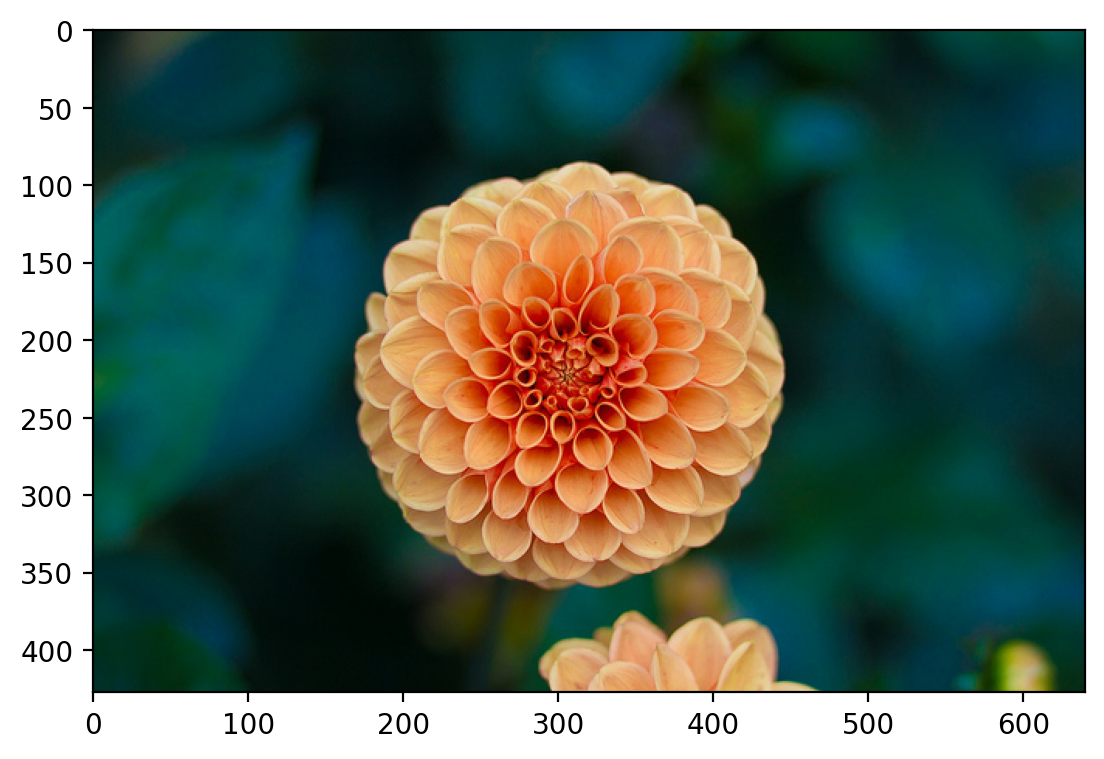

In [119]:
# Load sample images provided by scikit-learn into a NumPy array
images = np.asarray(load_sample_images().images)

# Load the last sample image
sample_image = images[-1]

# Show image
plt.imshow(sample_image)

print(f"Images: {images.shape}")
print(f"Sample image: {sample_image.shape}")
print(f"Sample pixel: {sample_image[225, 300]}")

## Preparing data for training

### A mandatory step

In Machine Learning, the chosen dataset has to be carefully prepared before using it to train a model. This can have a major impact on the outcome of the training process.

This important task, sometimes called *data preprocessing*, might involve:

- Splitting data between training, validation and test sets.
- Reshaping data.
- Removing superflous features (if any).
- Adding missing values.
- Scaling data.
- Transforming values into numeric form.
- Augmenting data.
- Engineering new features.

### Data splitting

Once trained, a ML model must be able to **generalize** (perform well with new data). In order to assert this ability, data is always split into two or three sets before training:

- **Training set** (typically 80% or more): fed to the model during training.
- **Validation set**: used to tune the model without biasing it in favor of the test set.
- **Test set**: used to check the final model's performance on unseen data.

![Dataset splitting](_images/dataset_splitting.png)

In [120]:
# Demonstrate the use of scikit-learn's train_test_split for splitting a dataset

# Create a random 30x4 matrix (fictitious inputs) and a random 30x1 vector (fictitious results)
x = np.random.rand(30, 4)
y = np.random.rand(30)
print(f"x: {x.shape}. y: {y.shape}")

# Split fictitious dataset between training and test sets, using a 75/25 ratio
# A unique call to train_test_split is mandatory to maintain inputs/target correspondance between samples
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

print(f"x_train: {x_train.shape}. y_train: {y_train.shape}")
print(f"x_test: {x_test.shape}. y_test: {y_test.shape}")

x: (30, 4). y: (30,)
x_train: (22, 4). y_train: (22,)
x_test: (8, 4). y_test: (8,)


### Image and video reshaping

A bitmap image can be represented as a 3D multidimensional array of dimensions $height \times width \times color\_channels$.

A video can be represented as a 4D multidimensional array of dimensions $frames \times height \times width \times color\_channels$.

They have to be **reshaped**, or more precisely *flattened* in that case, into a vector (1D tensor) before being fed to most ML algorithms.

![Reshaping an image](_images/image2vector.jpeg)

In [121]:
# Flatten the image, which is a 3D tensor, into a vector (1D tensor)
flattened_image = sample_image.reshape((427 * 640 * 3,))

# Alternative syntaxes to achieve the same result
# -1 means the new dimension is inferred from current dimensions
# Diference between flatten() and ravel() is explained here:
# https://numpy.org/doc/stable/user/absolute_beginners.html#reshaping-and-flattening-multidimensional-arrays
flattened_image = sample_image.reshape((-1,))
flattened_image = sample_image.ravel()
flattened_image = sample_image.flatten()

print(f"Flattened image: {flattened_image.shape}")

Flattened image: (819840,)


### Handling of missing values

Most ML algorithms cannot work with missing values in features.

Depending on the percentage of missing data, three options exist:
- remove the corresponding data samples;
- remove the whole feature(s);
- replace the missing values (using 0, the mean, the median or something more meaningful in the context).

In [131]:
# Demonstrate the use of scikit-learn's SimpleImputer for handling missing values

# Create a tensor with missing values
x = np.array([[7, 2, np.nan], [4, np.nan, 6], [10, 5, 9]])
print(x)

# Replace missing values with column-wise mean
imputer = SimpleImputer(strategy="mean")
print(imputer.fit_transform(x))

# Replace missing values with "Unknown"
imputer = SimpleImputer(strategy="constant", missing_values=None, fill_value="Unknown")
print(imputer.fit_transform([["M"], ["M"], [None], ["F"], [None]]))

[[ 7.  2. nan]
 [ 4. nan  6.]
 [10.  5.  9.]]
[[ 7.   2.   7.5]
 [ 4.   3.5  6. ]
 [10.   5.   9. ]]
[['M']
 ['M']
 ['Unknown']
 ['F']
 ['Unknown']]


### Feature scaling

Most ML algorithms work best when all features have a **similar scale**. Several solutions exist:

- **Min-Max scaling**: features are shifted and rescaled to the $[0,1]$ range by substracting the `min` value and dividing by `(max-min)` on the first axis.
- **Standardization**: features are centered (substracted by their mean) then reduced (divided by their standard deviation) on the first axis. All resulting features have a mean of 0 and a standard deviation of 1.

In [123]:
# Demonstrate the use of scikit-learn's MinMaxScaler to rescale values

# Generate a random 3x4 tensor with integer values between 1 and 10
x = np.random.randint(1, 10, (3, 4))
print(x)

# Compute min and max then scale tensor in one operation
x_scaled = MinMaxScaler().fit_transform(x)

print(x_scaled)
print(f"Minimum: {x_scaled.min(axis=0)}. Maximum: {x_scaled.max(axis=0)}")

[[6 5 8 3]
 [1 4 6 2]
 [3 8 5 6]]
[[1.         0.25       1.         0.25      ]
 [0.         0.         0.33333333 0.        ]
 [0.4        1.         0.         1.        ]]
Minimum: [0. 0. 0. 0.]. Maximum: [1. 1. 1. 1.]


In [124]:
# Demonstrate the use of scikit-learn's StandardScaler to standardize values

# Generate a random (3,4) tensor with integer values between 1 and 10
x = np.random.randint(1, 10, (3, 4))
print(x)

# Center and reduce data
scaler = StandardScaler().fit(x)
print(scaler.mean_)

x_scaled = scaler.transform(x)
print(x_scaled)

# New mean is 0. New standard deviation is 1
print(f"Mean: {x_scaled.mean()}. Std: {x_scaled.std()}")

[[2 1 3 2]
 [2 7 7 8]
 [3 2 6 2]]
[2.33333333 3.33333333 5.33333333 4.        ]
[[-0.70710678 -0.88900089 -1.37281295 -0.70710678]
 [-0.70710678  1.3970014   0.98058068  1.41421356]
 [ 1.41421356 -0.50800051  0.39223227 -0.70710678]]
Mean: 0.0. Std: 1.0


#### Feature scaling and training/test sets

In order to avoid [information leakage](https://stats.stackexchange.com/a/174865), the test set must be scaled with values calculated on the training set.

In [125]:
# Compute mean and std on training set
scaler = StandardScaler().fit(x_train)

# Standardize training and test sets, using mean and std computed on training set
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(f"Train mean: {x_train_scaled.mean(axis=0)}")
print(f"Train std: {x_train_scaled.std(axis=0)}")
print(f"Test mean: {x_test_scaled.mean(axis=0)}")
print(f"Test std: {x_test_scaled.std(axis=0)}")

Train mean: [ 4.03717464e-17  8.07434927e-17  1.51394049e-17 -2.29614307e-16]
Train std: [1. 1. 1. 1.]
Test mean: [-0.44110575 -0.65141874 -0.34561108 -0.12502486]
Test std: [0.85591862 0.81516664 1.0212625  1.31886361]


#### Image and video scaling

Individual pixel values for images and videos are typically integers in the $[0,255]$ range. This is not ideal for most ML algorithms.

Dividing them by $255.0$ to obtain floats into the $[0,1]$ range is a common practice.

In [126]:
# Scaling sample image pixels between 0 and 1
scaled_image = sample_image / 255.0

# Check that all values are in the [0,1] range
assert scaled_image.min() >= 0
assert scaled_image.max() <= 1

### Encoding of categorical features

Some features or targets may come as discrete rather than continuous values. Moreover, these discrete values might be strings. ML models are only able to manage numerical-only data.

A solution is to apply one-of-K encoding, also named **dummy encoding** or **one-hot encoding**. Each categorical feature with `K` possible values is transformed into a vector of `K` binary features, with one of them 1 and all others 0.

Note: using arbitrary integer values rather than binary vectors would create a proximity relationship between the new features, which could confuse the model during training.

In [127]:
# Demonstrate the use of scikit-learn's OneHotEncoder to one-hot encode categorical features

# Create a categorical variable with 3 different values
x = [["GOOD"], ["AVERAGE"], ["GOOD"], ["POOR"], ["POOR"]]

# Encoder input must be a matrix
# Output will be a sparse matrix where each column corresponds to one possible value of one feature
encoder = OneHotEncoder().fit(x)
x_hot = encoder.transform(x).toarray()

print(x_hot)
print(encoder.categories_)

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
[array(['AVERAGE', 'GOOD', 'POOR'], dtype=object)]


In [128]:
# Demonstrate one-hot encoding of categorical features given as integers

# Generate a (5,1) tensor with integer values between 0 and 9
x = np.random.randint(0, 9, (5, 1))
print(x)

# Encoder input must be a matrix
# Output will be a sparse matrix where each column corresponds to one possible value of one feature
x_hot = OneHotEncoder().fit_transform(x).toarray()

print(x_hot)

[[5]
 [2]
 [3]
 [2]
 [0]]
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


#### One-hot encoding and training/test sets

Depending on value distribution between training and test sets, some categories might appear only in one set.

The best solution is to one-hot encode based on the training set categories, ignoring test-only categories.

In [129]:
x_train = [["Blue"], ["Red"], ["Blue"], ["Green"]]
# "Yellow" is not present in training set
x_test = [
    ["Red"],
    ["Yellow"],
    ["Green"],
    ["Yellow"],
]

# Using categories from train set, ignoring unkwown categories
encoder = OneHotEncoder(handle_unknown="ignore").fit(x_train)
print(encoder.transform(x_train).toarray())
print(encoder.categories_)

# Unknown categories will result in a binary vector will all zeros
print(encoder.transform(x_test).toarray())

[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
[array(['Blue', 'Green', 'Red'], dtype=object)]
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


In [130]:
x = [["M"], ["M"], [None], ["F"]]

# Replace missing values with constant
print(
    SimpleImputer(
        strategy="constant", missing_values=None, fill_value="Unknown"
    ).fit_transform(x)
)

[['M']
 ['M']
 ['Unknown']
 ['F']]


### Data augmentation

**Data augmentation** is the process of enriching a dataset by adding new samples, slightly modified copies of existing data or newly created synthetic data.

[![Image augmentation example](_images/image_augmentation.png)](https://towardsdatascience.com/machinex-image-data-augmentation-using-keras-b459ef87cd22)

### Feature engineering

**Feature engineering** is the process of preparing the proper input features, in order to facilitate the learning task. The problem is made easier by expressing it in a simpler way. This usually requires a good domain knowledge.

The ability of deep neural networks to discover useful features by themselves has somewhat reduced the criticality of feature engineering. Nevertheless, it remains important in order to solve problems more elegantly and with fewer data.

Example (taken from the book [Deep Learning with Python](https://github.com/fchollet/deep-learning-with-python-notebooks)): the task of learning the time of day from a clock is far easier with engineered features rather than raw clock images.

[![Feature engineering](_images/feature_engineering.png)](https://www.manning.com/books/deep-learning-with-python)